In [1]:
import os
import pandas as pd
import gmaps
import googlemaps as g
import yaml
import numpy
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)
pd.set_option('display.notebook_repr_html', True)

# Loading dataset
df = pd.read_csv(os.path.join('..', 'datasets', 'Restaurant_Scores_Cleaned.csv'))
df = df.set_index('business_id')

# Applying google credentials
with open('google.yaml', 'r') as f:
    google_credentials = yaml.load(f)

google_api_key = google_credentials['api-key']
gmaps.configure(api_key = google_api_key)



df.tail()

,business_name,business_location,inspection_id,inspection_date,inspection_score,inspection_type,violation_id,violation_description,risk_category,address,location
business_id,,,,,,,,,,,
79588,AT&T PARK - Garden Bar,NaN,79588_20160410,04/10/2016 12:00:00 AM,98.0,Routine - Unscheduled,79588_20160410_103154,Unclean or degraded floors walls or ceilings,Low Risk,24 Willie Mays Plaza San Francisco,"(37.7785351, -122.3894833)"
5455,AT&T - CARVERY Stand-Field level,"(37.778382, -122.391151)",5455_20160410,04/10/2016 12:00:00 AM,96.0,Routine - Unscheduled,5455_20160410_103133,Foods not protected from contamination,Moderate Risk,24 WILLIE MAYS PLAZA San Francisco,"(37.778382, -122.391151)"
86829,Turtle Tower Restaurant,NaN,86829_20160412,04/12/2016 12:00:00 AM,NaN,Reinspection/Followup,NaN,NaN,NaN,645 Larkin St San Francisco,"(37.7839671, -122.4178402)"
85937,Tonga Room & Hurricane Bar,NaN,85937_20160411,04/11/2016 12:00:00 AM,98.0,Routine - Unscheduled,85937_20160411_103143,Inadequate warewashing facilities or equipment,Low Risk,950 Mason St San Francisco,"(37.7924958, -122.4100355)"
3133,Brandy Ho's Hunan Food,"(37.797407, -122.405996)",3133_20160411,04/11/2016 12:00:00 AM,85.0,Routine - Unscheduled,3133_20160411_103131,Moderate risk vermin infestation,Moderate Risk,217 Columbus Ave San Francisco,"(37.797407, -122.405996)"


In [2]:
#Dropping unnecessary address colums
df.drop(['business_location', 'inspection_id', 'inspection_date', 'risk_category','inspection_type', 'violation_id', 'violation_description', 'address'], inplace = True, axis = 1)

print len(df)
df.tail(20)

53729


,business_name,inspection_score,location
business_id,,,
71649,Milan Pizza,89.0,"(37.763856, -122.419585)"
5090,SUNSET SUPERMARKET,78.0,"(37.763221, -122.483832)"
4656,STARBUCKS COFFEE CO,94.0,"(37.784247, -122.403989)"
73955,Torrez Taqueria Inc.,80.0,"(37.7242854, -122.4570752)"
5479,"AT&T - JOE GARCIA, Edsel Ford Fong, Wine Bar ...",96.0,"(37.778382, -122.391151)"
85594,The Pearl,NaN,"(37.7615192, -122.38895)"
84634,Gyros on Wheels,87.0,"(37.7697799, -122.4120353)"
73955,Torrez Taqueria Inc.,80.0,"(37.7242854, -122.4570752)"
1516,AT&T - FIELD CLUB KITCHEN [145082],94.0,"(37.778382, -122.391151)"


In [3]:
# Identifying Nulls 
null_data = df[df['location'].isnull()]
null_data.head()
len(null_data)



93

In [4]:
# Drop all nulls since is a small number
df.dropna(subset = ['location'], inplace = True)
len(df)

53636

In [5]:
# Dropping rows where lat long = 0,0
df = df[df.location != '(0, 0)']
len(df)
df.head()

,business_name,inspection_score,location
business_id,,,
10,Tiramisu Kitchen,92.0,"(37.791116, -122.403816)"
10,Tiramisu Kitchen,92.0,"(37.791116, -122.403816)"
10,Tiramisu Kitchen,92.0,"(37.791116, -122.403816)"
10,Tiramisu Kitchen,94.0,"(37.791116, -122.403816)"
10,Tiramisu Kitchen,94.0,"(37.791116, -122.403816)"


In [6]:
# df = df.groupby(['business_name', 'location']).mean()
grouped_df = df.groupby(['business_id','business_name', 'location'], as_index = False)['inspection_score'].mean()
type(grouped_df)
grouped_df
# df.apply(lambda x: x[''].set_index())

,business_name,location,inspection_score
0,Tiramisu Kitchen,"(37.791116, -122.403816)",87.400000
1,Nrgize Lifestyle Cafe,"(37.786848, -122.421547)",94.000000
2,OMNI S.F. Hotel - 2nd Floor Pantry,"(37.792888, -122.403135)",96.333333
3,Norman's Ice Cream and Freezes,"(37.807155, -122.419004)",87.750000
4,CHARLIE'S DELI CAFE,"(37.747114, -122.413641)",83.200000
5,ART'S CAFE,"(37.764013, -122.465749)",92.500000
6,SUSHI ZONE,"(37.771437, -122.423892)",82.500000
7,RHODA GOLDMAN PLAZA,"(37.784626, -122.437734)",94.666667
8,CAFE X + O,"(37.742325, -122.426476)",91.333333
9,Oasis Grill,"(37.794483, -122.396584)",75.000000


In [7]:
# Identifying Nulls 
null_data = grouped_df[grouped_df['inspection_score'].isnull()]
null_data.head()
len(null_data)

481

In [8]:
grouped_df['inspection_score'].value_counts()

100.000000    466
96.000000     260
98.000000     190
94.000000     184
92.000000     146
90.000000     130
99.000000      86
88.000000      76
91.000000      75
93.000000      71
             ... 
71.090909       1
92.533333       1
78.444444       1
78.285714       1
75.538462       1
82.428571       1
96.833333       1
73.285714       1
60.173913       1
71.545455       1
Name: inspection_score, Length: 1192, dtype: int64

In [9]:
type(grouped_df.inspection_score)

pandas.core.series.Series

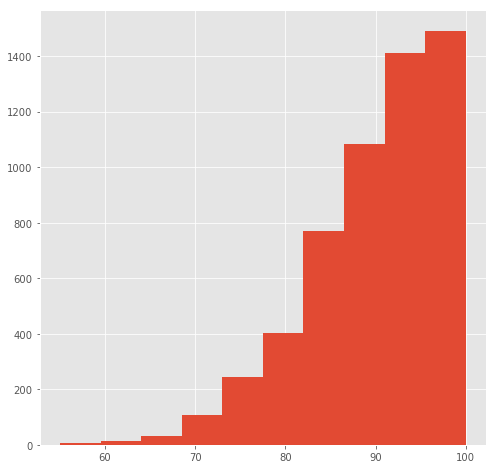

In [10]:
grouped_df.inspection_score.hist(figsize = (8,8))

In [11]:
grouped_df.inspection_score.quantile([.25, .5, .75])

0.25    85.666667
0.50    91.250000
0.75    96.000000
Name: inspection_score, dtype: float64

In [12]:
def returnFloats(listLocations):
    locations = list(listLocations.location)
    answer = []
    i = 0
    while i < len(locations):
        temp = eval(locations[i])
        answer.append(temp)
        i += 1
    return answer
    

In [13]:
def returnScores(listScores):
    scores = list(listScores.inspection_score)
    answer = []
    i = 0
    while i < len(scores):
        temp = eval(scores[i])
        answer.append(temp)
        i += 1
    return answer

In [14]:
grouped_df

,business_name,location,inspection_score
0,Tiramisu Kitchen,"(37.791116, -122.403816)",87.400000
1,Nrgize Lifestyle Cafe,"(37.786848, -122.421547)",94.000000
2,OMNI S.F. Hotel - 2nd Floor Pantry,"(37.792888, -122.403135)",96.333333
3,Norman's Ice Cream and Freezes,"(37.807155, -122.419004)",87.750000
4,CHARLIE'S DELI CAFE,"(37.747114, -122.413641)",83.200000
5,ART'S CAFE,"(37.764013, -122.465749)",92.500000
6,SUSHI ZONE,"(37.771437, -122.423892)",82.500000
7,RHODA GOLDMAN PLAZA,"(37.784626, -122.437734)",94.666667
8,CAFE X + O,"(37.742325, -122.426476)",91.333333
9,Oasis Grill,"(37.794483, -122.396584)",75.000000


In [15]:
# Drop all nulls since is a small number
grouped_df.dropna(subset = ['inspection_score'], inplace = True)
len(grouped_df)
grouped_df

,business_name,location,inspection_score
0,Tiramisu Kitchen,"(37.791116, -122.403816)",87.400000
1,Nrgize Lifestyle Cafe,"(37.786848, -122.421547)",94.000000
2,OMNI S.F. Hotel - 2nd Floor Pantry,"(37.792888, -122.403135)",96.333333
3,Norman's Ice Cream and Freezes,"(37.807155, -122.419004)",87.750000
4,CHARLIE'S DELI CAFE,"(37.747114, -122.413641)",83.200000
5,ART'S CAFE,"(37.764013, -122.465749)",92.500000
6,SUSHI ZONE,"(37.771437, -122.423892)",82.500000
7,RHODA GOLDMAN PLAZA,"(37.784626, -122.437734)",94.666667
8,CAFE X + O,"(37.742325, -122.426476)",91.333333
9,Oasis Grill,"(37.794483, -122.396584)",75.000000


In [76]:
# One time export of the output to be used later by foursquare data
# grouped_df.to_csv('avg_inspection_scores_by_venue.csv') 

In [16]:
highrisk_df = grouped_df[grouped_df.inspection_score <= 85.66]
highrisk_df = highrisk_df[['location']]
highrisk_locations = returnFloats(highrisk_df)
# highrisk_weights = highrisk_df[['inspection_score']]
# highrisk_weights = returnScores(highrisk_weights)

# modrisk_df = grouped_df[(grouped_df.inspection_score > 85.66) & (grouped_df.inspection_score <= 91.25)]
# modrisk_df = modrisk_df[['location']]
# modrisk_locations = returnFloats(modrisk_df)

# lowrisk_df = grouped_df[(grouped_df.inspection_score > 91.25) & (grouped_df.inspection_score <= 96.00)]
# lowrisk_df = lowrisk_df[['location']]
# lowrisk_locations = returnFloats(lowrisk_df)

norisk_df = grouped_df[(grouped_df.inspection_score > 96)]
norisk_df = norisk_df[['location']]
norisk_locations = returnFloats(norisk_df)



In [64]:
# Commenting out marker plot

# figure = gmaps.figure()
# san_fran_coordinates = (37.7749, -122.4194)
# gmaps.figure(center=san_fran_coordinates, zoom_level=12)
# figure.add_layer(gmaps.symbol_layer(highrisk_locations, fill_color = 'red', stroke_color = 'red', scale = 2))
# # figure.add_layer(gmaps.symbol_layer(modrisk_locations, fill_color = 'yellow', stroke_color = 'yellow', scale = 2))
# # figure.add_layer(gmaps.symbol_layer(lowrisk_locations, fill_color = 'blue', stroke_color = 'blue', scale = 2))
# figure.add_layer(gmaps.symbol_layer(norisk_locations, fill_color = 'green', stroke_color = 'green', scale = 2))
# figure



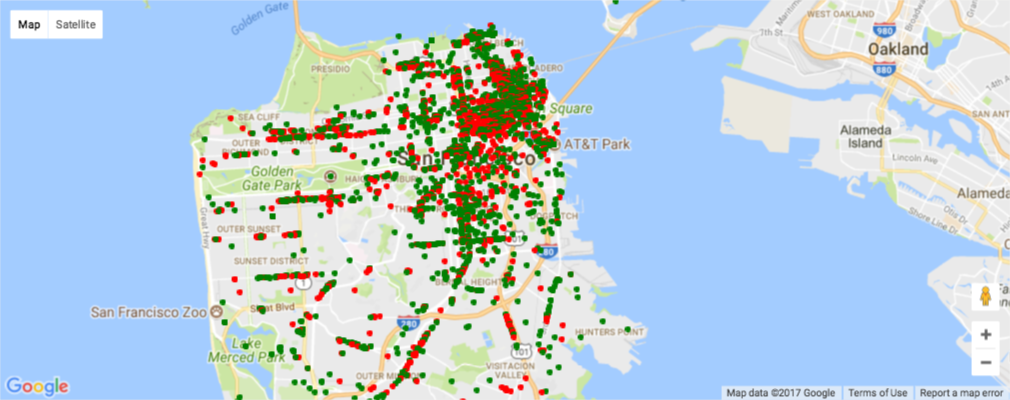

In [63]:
Image('markers.png')

In [59]:
# High Risk Restaurants heatmap
fig = gmaps.figure()
san_fran_coordinates = (37.7749, -122.4194)
gmaps.figure(center=san_fran_coordinates, zoom_level=12)
heatmap_layer = gmaps.heatmap_layer(highrisk_locations)
fig.add_layer(heatmap_layer)
# fig

In [60]:
heatmap_layer.max_intensity = 5
heatmap_layer.point_radius = 10
heatmap_layer.dissipating = True

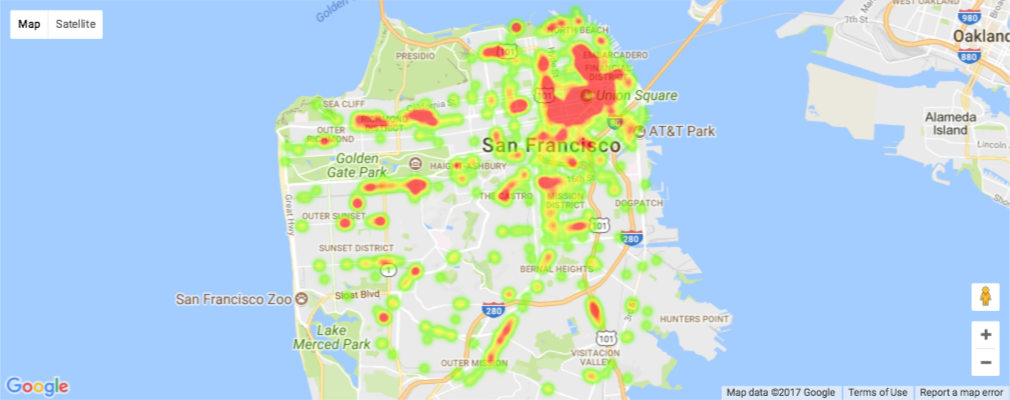

In [58]:
Image('High_risk_heatmap.png')

In [71]:
# High Risk Restaurants heatmap
fig2 = gmaps.figure()
gmaps.figure(center=san_fran_coordinates, zoom_level=12)
heatmap_layer2 = gmaps.heatmap_layer(norisk_locations)
fig2.add_layer(heatmap_layer2)
# fig2

In [69]:
heatmap_layer2.max_intensity = 5
heatmap_layer2.point_radius = 10
heatmap_layer2.dissipating = True

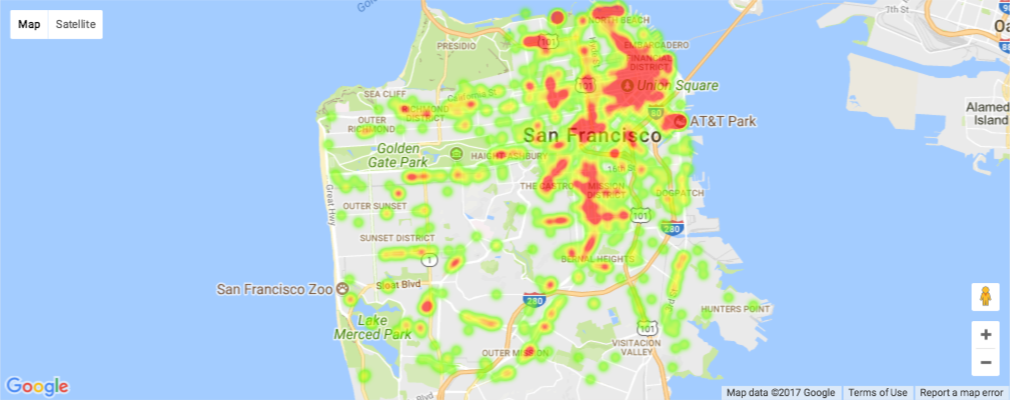

In [70]:
Image('No_risk_heatmap.png')